In [8]:
"""traditional prog : rules+data=answer
   machine learning : answers+data=rules
   """
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
import numpy as np
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs= np.array([-1,0,1,2,3,4],dtype=float)
ys= np.array([-3,-1,1,3,5,7],dtype=float)
model.fit(xs,ys, epochs=5000)


Epoch 1/5000
1/1 [==============================] - 1s 721ms/step - loss: 27.2303
Epoch 2/5000
1/1 [==============================] - 0s 9ms/step - loss: 21.7240
Epoch 3/5000
1/1 [==============================] - 0s 11ms/step - loss: 17.3858
Epoch 4/5000
1/1 [==============================] - 0s 12ms/step - loss: 13.9666
Epoch 5/5000
1/1 [==============================] - 0s 9ms/step - loss: 11.2707
Epoch 6/5000
1/1 [==============================] - 0s 10ms/step - loss: 9.1438
Epoch 7/5000
1/1 [==============================] - 0s 13ms/step - loss: 7.4648
Epoch 8/5000
1/1 [==============================] - 0s 11ms/step - loss: 6.1383
Epoch 9/5000
1/1 [==============================] - 0s 13ms/step - loss: 5.0892
Epoch 10/5000
1/1 [==============================] - 0s 9ms/step - loss: 4.2585
Epoch 11/5000
1/1 [==============================] - 0s 13ms/step - loss: 3.5998
Epoch 12/5000
1/1 [==============================] - 0s 13ms/step - loss: 3.0763
Epoch 13/5000
1/1 [===============

In [9]:
print(model.predict([10,20,40]))

1/1 [==============================] - 0s 165ms/step
[[18.999987]
 [38.99997 ]
 [78.99994 ]]


code_week2


In [94]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()



label : 8

 image pixel array : [[  0   0   0   0   0   0   0   0   0   0   0   2   0  65 108  78   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0  47 123   0  87  38   0   3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   0 167  51   0  38 157   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 127   0   0   0 142   5   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0  63 112   0   5   0 102 106   0   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   8   0 103  83   0   5   0  38 168   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   5   0 140  39   0   3   0   0 182  17   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0 152   0   0   1   0   0 156 102   0   2   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   6   5   0  32 20

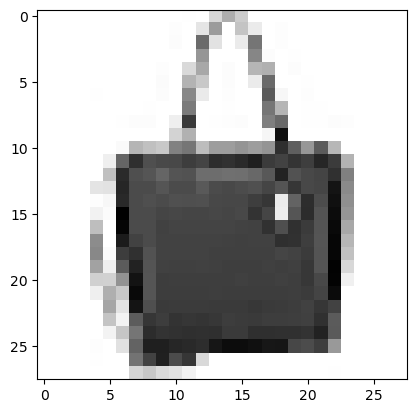

In [95]:
index=44879
np.set_printoptions(linewidth=320)
print(f'label : {train_label[index]}')
print(f'\n image pixel array : {train_img[index]}')
plt.imshow(train_img[index],cmap='Greys')

In [96]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(28,activation=tf.nn.relu),
    tf.keras.layers.Dense(28*2,activation=tf.nn.relu),
    tf.keras.layers.Dense(28*3,activation=tf.nn.relu),
    tf.keras.layers.Dense(28*4,activation=tf.nn.relu),
    tf.keras.layers.Dense(28*5,activation=tf.nn.relu),
    tf.keras.layers.Dense(100,activation=tf.nn.relu),
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [97]:
train_img=train_img/255
test_img=test_img/225

In [103]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(s, epoch, logs={}):
        if(logs.get('loss')<0.1):
            print('\nLoss is low, cancelling training.')
            s.model.stop_training =True

In [104]:
callbacks= myCallbacks()
model.compile(optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_img,train_label,epochs=50,callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2471 - accuracy: 0.9083
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2419 - accuracy: 0.9086
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2441 - accuracy: 0.9086
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2374 - accuracy: 0.9112
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2364 - accuracy: 0.9105
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2346 - accuracy: 0.9130
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2305 - accuracy: 0.9135
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2299 - accuracy: 0.9133
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2268 - accuracy: 0.9146
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.223

In [105]:
model.evaluate(test_img,test_label)
#[0.35531529784202576, 0.8758000135421753]

313/313 [==============================] - 1s 2ms/step - loss: 0.5042 - accuracy: 0.8814


[0.5042428970336914, 0.8813999891281128]

In [108]:
classifications = model.predict(test_img)
np.set_printoptions(suppress=True, precision=3)
print(classifications[0])
#[0.000008000524   0.00000011620494 0.000011192225   0.0000060001494  0.000007724701   0.026819097      0.000038662427   0.007461979      0.00030100782    0.96534616      ]

313/313 [==============================] - 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [107]:
print(test_label[0])

9


In [2]:
pip uninstall jupyter-git


Note: you may need to restart the kernel to use updated packages.
